In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from scipy.stats import f_oneway
from sklearn.linear_model import LogisticRegression


In [17]:
df = pd.read_csv("../data/total_df.csv", index_col="Unnamed: 0")

In [18]:
df.sample()

,id_web,lat,long,comment,language,sentiment,type_sentiment,characters,emotionality,country_name,...,mean_ed_exp,mean_literacy,mean_ARV_coverage,mean_health_exp,mean_UHC_coverage,mean_rights,mean_sex_index,censor,transition,mean_hate_protection
40179,42928,49.489627,8.463729,"met a trans woman who ""spotted"" me. after talk...",en,-0.128,1,207,0.041203,Germany,...,3.605611,97.989998,63.466667,6.370028,76.074074,1.343344,0.135941,01. No censorship,"01. Legal, surgery not required",0.111111


In [19]:
df.columns

Index(['id_web', 'lat', 'long', 'comment', 'language', 'sentiment',
       'type_sentiment', 'characters', 'emotionality', 'country_name',
       'country_code', 'region', 'income_group', 'mean_stability', 'mean_law',
       'mean_female_seats', 'mean_voice', 'mean_gdp', 'mean_children_out',
       'mean_ed_exp', 'mean_literacy', 'mean_ARV_coverage', 'mean_health_exp',
       'mean_UHC_coverage', 'mean_rights', 'mean_sex_index', 'censor',
       'transition', 'mean_hate_protection'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148715 entries, 0 to 148714
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id_web                148715 non-null  int64  
 1   lat                   148715 non-null  float64
 2   long                  148715 non-null  float64
 3   comment               148715 non-null  object 
 4   language              148715 non-null  object 
 5   sentiment             148715 non-null  float64
 6   type_sentiment        148715 non-null  int64  
 7   characters            148715 non-null  int64  
 8   emotionality          148715 non-null  float64
 9   country_name          140878 non-null  object 
 10  country_code          140878 non-null  object 
 11  region                140377 non-null  object 
 12  income_group          140377 non-null  object 
 13  mean_stability        56492 non-null   float64
 14  mean_law              69847 non-null   float64
 15  mean_

# Discourse by mean_stability:
**Low corr, high significance**

## Discourse as sentiment

Low negative corr, but high significance.

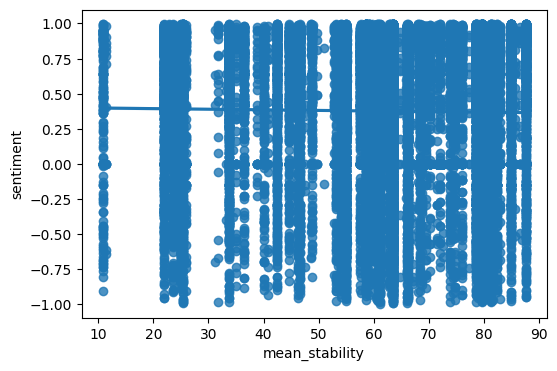

In [112]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.sentiment, x= df.mean_stability, fit_reg=True);

In [113]:
df[["sentiment", "mean_stability"]].corr()

,sentiment,mean_stability
sentiment,1.000000,-0.015461
mean_stability,-0.015461,1.000000


In [114]:
results = smf.ols("sentiment ~ mean_stability", data = df).fit()
results.pvalues, results.params

(Intercept         0.000000
 mean_stability    0.000238
 dtype: float64,
 Intercept         0.402323
 mean_stability   -0.000425
 dtype: float64)

## Discourse as type_sentiment

Considering it as continuous or as categorical (ANOVA and Multinomial Logistic Regression) it also shows a small negative correlation but high significance.

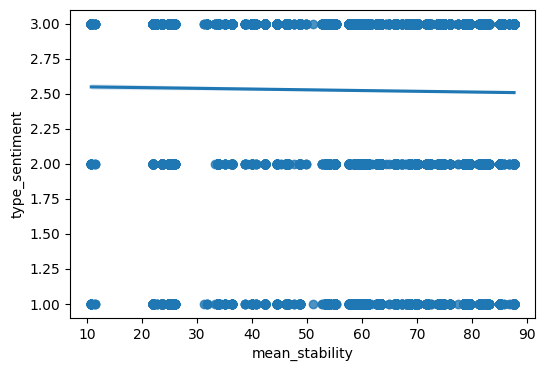

In [115]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.type_sentiment, x= df.mean_stability, fit_reg=True);

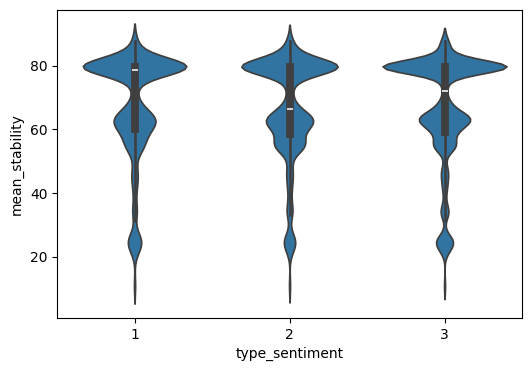

In [116]:
plt.figure(figsize=(6, 4))
sns.violinplot(x = df.type_sentiment, y= df.mean_stability);

In [117]:
group1 = df[["mean_stability"]][df["type_sentiment"] == 1].dropna()
group2 = df[["mean_stability"]][df["type_sentiment"] == 2].dropna()
group3 = df[["mean_stability"]][df["type_sentiment"] == 3].dropna()
f_statistic, p_value = f_oneway(group1, group2, group3)
f_statistic, p_value

(array([6.00402096]), array([0.00247038]))

In [118]:
results = smf.ols("type_sentiment ~ mean_stability", data = df[["type_sentiment", "mean_stability"]]).fit()
results.pvalues, results.params

(Intercept         0.000000
 mean_stability    0.004025
 dtype: float64,
 Intercept         2.553317
 mean_stability   -0.000528
 dtype: float64)

In [119]:
results = smf.mnlogit("type_sentiment ~ mean_stability", data = df[["type_sentiment", "mean_stability"]]).fit()
results.pvalues, results.params

Optimization terminated successfully.
         Current function value: 0.860404
         Iterations 5


(                           0              1
 Intercept       2.475825e-07  5.782959e-245
 mean_stability  3.639696e-03   8.160219e-04,
                        0         1
 Intercept       0.308784  1.637578
 mean_stability -0.002527 -0.002375)

## Discourse as emotionality

Low negative corr, but high significance.

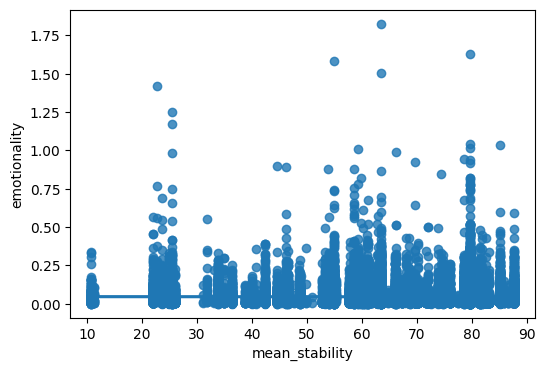

In [120]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.emotionality, x= df.mean_stability, fit_reg=True);

In [121]:
df[["emotionality", "mean_stability"]].corr()

,emotionality,mean_stability
emotionality,1.000000,-0.003962
mean_stability,-0.003962,1.000000


In [122]:
results = smf.ols("emotionality ~ mean_stability", data = df).fit()
results.pvalues, results.params

(Intercept         0.000000
 mean_stability    0.346364
 dtype: float64,
 Intercept         0.046340
 mean_stability   -0.000013
 dtype: float64)

# Discourse by mean_law

## Discourse as sentiment

Low negative corr, but high significance.

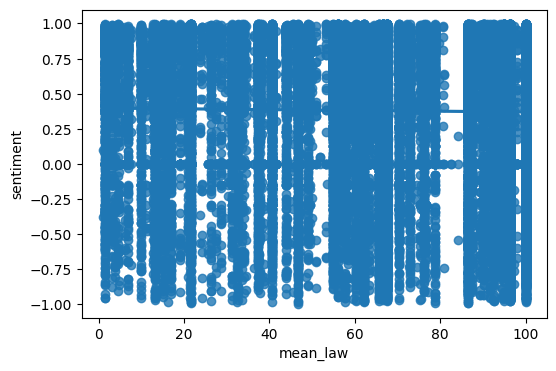

In [123]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.sentiment, x= df.mean_law, fit_reg=True);

In [124]:
df[["sentiment", "mean_law"]].corr()

,sentiment,mean_law
sentiment,1.000000,-0.015966
mean_law,-0.015966,1.000000


In [125]:
results = smf.ols("sentiment ~ mean_law", data = df).fit()
results.pvalues, results.params

(Intercept    0.000000
 mean_law     0.000024
 dtype: float64,
 Intercept    0.398039
 mean_law    -0.000284
 dtype: float64)

## Discourse as type_sentiment
Considering it as continuous or as categorical (ANOVA and Multinomial Logistic Regression) it also shows a small negative correlation but high significance.

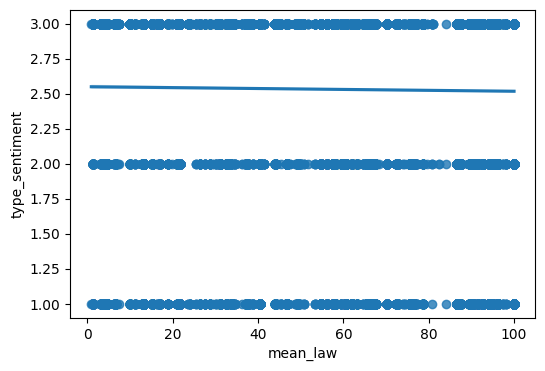

In [126]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.type_sentiment, x= df.mean_law, fit_reg=True);

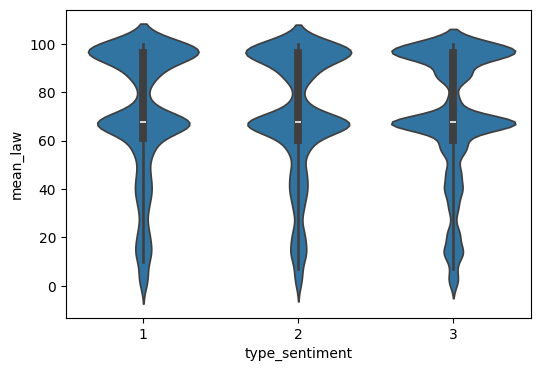

In [127]:
plt.figure(figsize=(6, 4))
sns.violinplot(x = df.type_sentiment, y= df.mean_law);

In [128]:
group1 = df[["mean_law"]][df["type_sentiment"] == 1].dropna()
group2 = df[["mean_law"]][df["type_sentiment"] == 2].dropna()
group3 = df[["mean_law"]][df["type_sentiment"] == 3].dropna()
f_statistic, p_value = f_oneway(group1, group2, group3)
f_statistic, p_value

(array([4.8774949]), array([0.00761866]))

In [129]:
results = smf.ols("type_sentiment ~ mean_law", data = df[["type_sentiment", "mean_law"]]).fit()
results.pvalues, results.params

(Intercept    0.000000
 mean_law     0.002451
 dtype: float64,
 Intercept    2.549065
 mean_law    -0.000324
 dtype: float64)

In [130]:
results = smf.mnlogit("type_sentiment ~ mean_law", data = df[["type_sentiment", "mean_law"]]).fit()
results.pvalues, results.params

Optimization terminated successfully.
         Current function value: 0.851638
         Iterations 5


(                      0        1
 Intercept  7.009181e-07  0.00000
 mean_law   6.160901e-02  0.00186,
                   0         1
 Intercept  0.191945  1.590391
 mean_law  -0.000955 -0.001285)

## Discourse as emotionality
Low negative corr, but high significance.

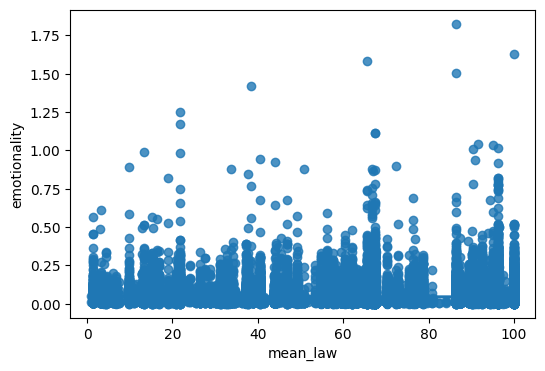

In [131]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.emotionality, x= df.mean_law, fit_reg=True);

In [132]:
df[["emotionality", "mean_law"]].corr()

,emotionality,mean_law
emotionality,1.000000,-0.005165
mean_law,-0.005165,1.000000


In [133]:
results = smf.ols("emotionality ~ mean_law", data = df).fit()
results.pvalues, results.params

(Intercept    0.000000
 mean_law     0.172223
 dtype: float64,
 Intercept    0.045564
 mean_law    -0.000011
 dtype: float64)

# Discourse by mean_female_seats

## Discourse as sentiment
Low negative corr, but significant.

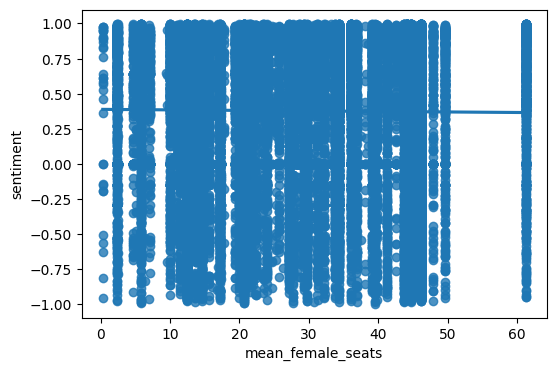

In [135]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.sentiment, x= df.mean_female_seats, fit_reg=True);

In [136]:
df[["sentiment", "mean_female_seats"]].corr()

,sentiment,mean_female_seats
sentiment,1.000000,-0.011651
mean_female_seats,-0.011651,1.000000


In [137]:
results = smf.ols("sentiment ~ mean_female_seats", data = df).fit()
results.pvalues, results.params

(Intercept            0.000000
 mean_female_seats    0.002097
 dtype: float64,
 Intercept            0.388616
 mean_female_seats   -0.000371
 dtype: float64)

## Discourse as type_sentiment
Considering it as continuous or as categorical (ANOVA and Multinomial Logistic Regression) it also shows a small negative correlation but high significance.

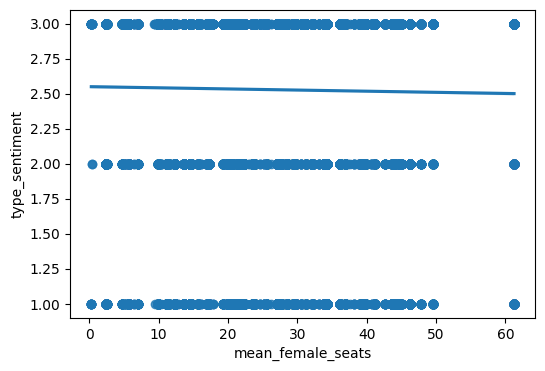

In [140]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.type_sentiment, x= df.mean_female_seats, fit_reg=True);

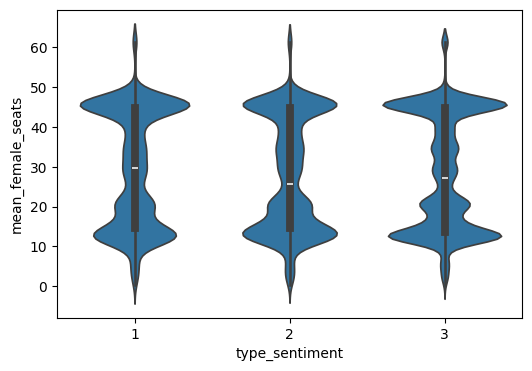

In [141]:
plt.figure(figsize=(6, 4))
sns.violinplot(x = df.type_sentiment, y= df.mean_female_seats);

In [142]:
group1 = df[["mean_female_seats"]][df["type_sentiment"] == 1].dropna()
group2 = df[["mean_female_seats"]][df["type_sentiment"] == 2].dropna()
group3 = df[["mean_female_seats"]][df["type_sentiment"] == 3].dropna()
f_statistic, p_value = f_oneway(group1, group2, group3)
f_statistic, p_value

(array([31.92705298]), array([1.38230638e-14]))

In [143]:
results = smf.ols("type_sentiment ~ mean_female_seats", data = df[["type_sentiment", "mean_female_seats"]]).fit()
results.pvalues, results.params

(Intercept            0.000000
 mean_female_seats    0.000025
 dtype: float64,
 Intercept            2.549373
 mean_female_seats   -0.000808
 dtype: float64)

In [144]:
results = smf.mnlogit("type_sentiment ~ mean_female_seats", data = df[["type_sentiment", "mean_female_seats"]]).fit()
results.pvalues, results.params

Optimization terminated successfully.
         Current function value: 0.851275
         Iterations 5


(                              0             1
 Intercept          2.829481e-29  0.000000e+00
 mean_female_seats  3.476116e-15  6.676732e-10,
                           0         1
 Intercept          0.331264  1.631099
 mean_female_seats -0.007169 -0.004522)

## Discourse as emotionality
Low negative corr, but high significance.

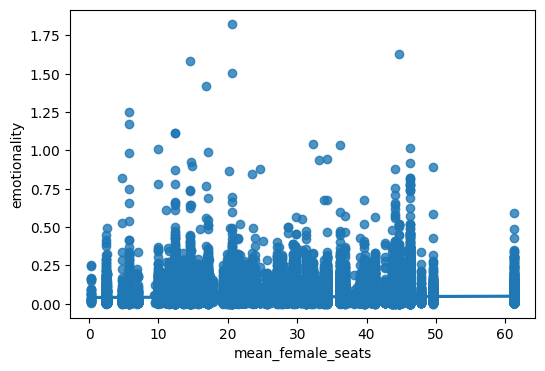

In [145]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.emotionality, x= df.mean_female_seats, fit_reg=True);

In [146]:
df[["emotionality", "mean_female_seats"]].corr()

,emotionality,mean_female_seats
emotionality,1.000000,0.034197
mean_female_seats,0.034197,1.000000


In [147]:
results = smf.ols("emotionality ~ mean_female_seats", data = df).fit()
results.pvalues, results.params

(Intercept            0.000000e+00
 mean_female_seats    1.697854e-19
 dtype: float64,
 Intercept            0.041037
 mean_female_seats    0.000130
 dtype: float64)

In [ ]:
# Discourse by mean_law

## Discourse as sentiment
Low negative corr, but high significance.

plt.figure(figsize=(6, 4))
sns.regplot(y = df.sentiment, x= df.mean_law, fit_reg=True);

df[["sentiment", "mean_stability"]].corr()

results = smf.ols("sentiment ~ mean_law", data = df).fit()
results.pvalues, results.params

## Discourse as type_sentiment
Considering it as continuous or as categorical (ANOVA and Multinomial Logistic Regression) it also shows a small negative correlation but high significance.

plt.figure(figsize=(6, 4))
sns.regplot(y = df.type_sentiment, x= df.mean_law, fit_reg=True);

plt.figure(figsize=(6, 4))
sns.violinplot(x = df.type_sentiment, y= df.mean_law);

group1 = df[["mean_law"]][df["type_sentiment"] == 1].dropna()
group2 = df[["mean_law"]][df["type_sentiment"] == 2].dropna()
group3 = df[["mean_law"]][df["type_sentiment"] == 3].dropna()
f_statistic, p_value = f_oneway(group1, group2, group3)
f_statistic, p_value

results = smf.ols("type_sentiment ~ mean_law", data = df[["type_sentiment", "mean_law"]]).fit()
results.pvalues, results.params

results = smf.mnlogit("type_sentiment ~ mean_law", data = df[["type_sentiment", "mean_law"]]).fit()
results.pvalues, results.params

## Discourse as emotionality
Low negative corr, but high significance.

plt.figure(figsize=(6, 4))
sns.regplot(y = df.emotionality, x= df.mean_law, fit_reg=True);

df[["emotionality", "mean_law"]].corr()

results = smf.ols("emotionality ~ mean_law", data = df).fit()
results.pvalues, results.params

region                140377 non-null  object 
 12  income_group          140377 non-null  object 
 15  mean_female_seats     69706 non-null   float64
 16  mean_voice            69847 non-null   float64
 17  mean_gdp              69756 non-null   float64
 18  mean_children_out     69622 non-null   float64
 19  mean_ed_exp           69741 non-null   float64
 20  mean_literacy         69608 non-null   float64
 21  mean_ARV_coverage     56492 non-null   float64
 22  mean_health_exp       69691 non-null   float64
 23  mean_UHC_coverage     69706 non-null   float64
 24  mean_rights           69706 non-null   float64
 25  mean_sex_index        69706 non-null   float64
 26  censor                140204 non-null  object 
 27  transition            139838 non-null  object 
 28  mean_hate_protection